In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
import ast

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [7]:
df_exploded = df.explode('job_skills')

In [18]:
df_exploded[['job_title_short','job_skills']].value_counts().tail(10)

job_title_short        job_skills 
Senior Data Engineer   ocaml          1
Data Scientist         nuxt.js        1
Business Analyst       f#             1
Senior Data Analyst    wsl            1
                       apl            1
Cloud Engineer         delphi         1
Senior Data Scientist  objective-c    1
Senior Data Analyst    couchdb        1
Cloud Engineer         haskell        1
Data Analyst           suse           1
Name: count, dtype: int64

In [20]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [27]:
df_skills_count = skills_count.reset_index(name='skill count')

df_skills_count = df_skills_count.sort_values(by='skill count', ascending=False,ignore_index=True)

In [28]:
df_skills_count

,job_title_short,job_skills,skill count
0,Data Scientist,python,113711
1,Data Engineer,sql,113130
2,Data Engineer,python,108022
3,Data Analyst,sql,92428
4,Data Scientist,sql,78982
...,...,...,...
2251,Cloud Engineer,delphi,1
2252,Senior Data Scientist,objective-c,1
2253,Senior Data Analyst,couchdb,1
2254,Cloud Engineer,haskell,1


<Axes: ylabel='job_skills'>

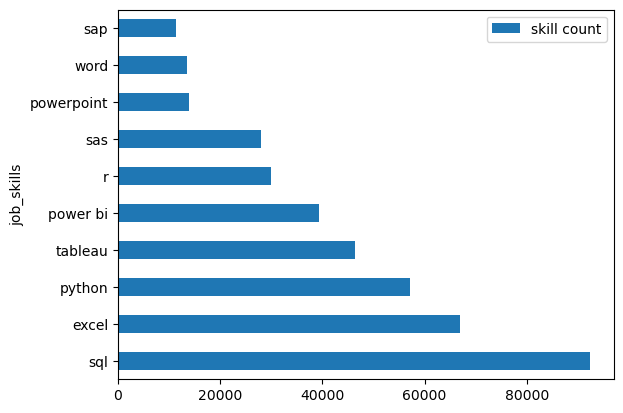

In [39]:
df_skill_final = df_skills_count[df_skills_count['job_title_short'] == 'Data Analyst'].head(10)
df_skill_final.plot(kind='barh', x ='job_skills', y='skill count')